In [1]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
ords_prods_viz = pd.read_pickle(r'/Volumes/Seagate Backup Plus Drive/Career Foundry/08-2020 Instacart Basket Analysis/02 Data/Prepared Data/ords_prods_agg.pkl')

### Creating Bar Charts

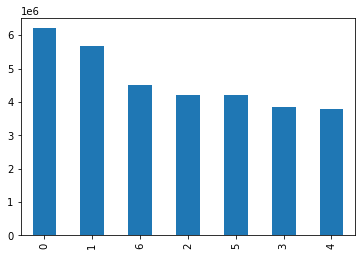

In [3]:
ords_prods_viz['orders_day_of_week'].value_counts().plot.bar()

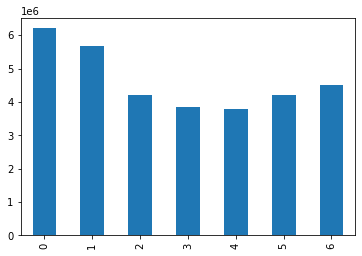

In [4]:
# Sort by numerical order

ords_prods_viz['orders_day_of_week'].value_counts().sort_index().plot.bar()

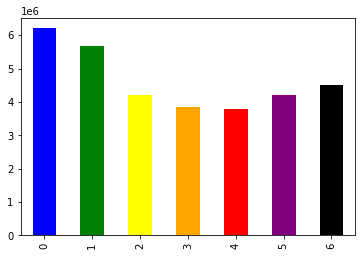

In [6]:
# Add color

ords_prods_viz['orders_day_of_week'].value_counts().sort_index().plot.bar(color =['blue', 'green', 'yellow', 'orange', 'red', 'purple', 'black'])

### Exporting Charts

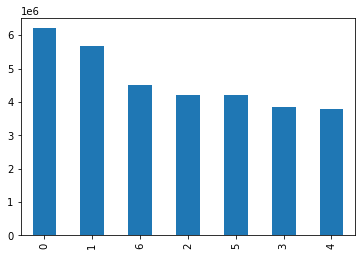

In [9]:
bar = ords_prods_viz['orders_day_of_week'].value_counts().plot.bar()

In [11]:
# Define path to export

path = r'/Volumes/Seagate Backup Plus Drive/Career Foundry/08-2020 Instacart Basket Analysis'

In [12]:
## Save image to hard drive

bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_orders_dow.png'))

### Creating Histograms and Scatterplots

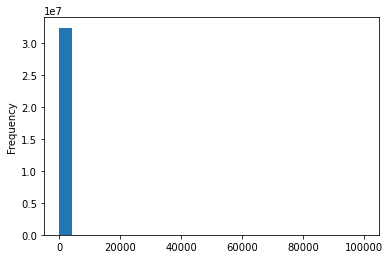

In [13]:
# Create histogram of 'prices' column

ords_prods_viz['prices'].plot.hist(bins = 25)

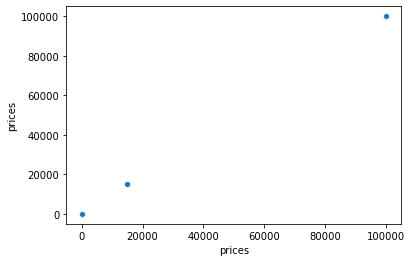

In [14]:
# Create scatterplot

sns.scatterplot(x = 'prices', y = 'prices', data = ords_prods_viz)

In [15]:
# Check for high values

ords_prods_viz.loc[ords_prods_viz['prices'] > 100]

,Unnamed: 0_x,Unnamed: 0.1,order_id,user_id,eval_set,user_order_count,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,...,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_price,spender,mean_frequency,frequency_flag
10030345,171,171,912404,17,prior,12,2,14,5.0,21553,...,High-range product,Regularly busy,Regularly busy,Average orders,40,Regular customer,108.648299,High spender,8.268041,Frequent customer
10030346,181,181,603376,17,prior,22,6,16,4.0,21553,...,High-range product,Regularly busy,Regularly busy,Average orders,40,Regular customer,108.648299,High spender,8.268041,Frequent customer
10030347,1944,1944,3264360,135,prior,2,2,21,13.0,21553,...,High-range product,Regularly busy,Regularly busy,Average orders,4,New customer,1154.792308,High spender,11.916667,Regular customer
10030348,1945,1945,892534,135,prior,3,0,8,12.0,21553,...,High-range product,Busiest day,Busiest days,Average orders,4,New customer,1154.792308,High spender,11.916667,Regular customer
10030349,5708,5708,229704,342,prior,8,1,19,30.0,21553,...,High-range product,Regularly busy,Busiest days,Average orders,16,Regular customer,114.426619,High spender,20.106061,Non-frequent customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29166209,3386542,3386542,2249946,204099,prior,29,0,8,4.0,33664,...,High-range product,Busiest day,Busiest days,Average orders,39,Regular customer,1106.743956,High spender,8.118644,Frequent customer
29166210,3386544,3386544,2363282,204099,prior,31,0,9,2.0,33664,...,High-range product,Busiest day,Busiest days,Average orders,39,Regular customer,1106.743956,High spender,8.118644,Frequent customer
29166211,3391313,3391313,3181945,204395,prior,13,3,15,8.0,33664,...,High-range product,Regularly busy,Least busy,Average orders,15,Regular customer,451.153540,High spender,4.971292,Frequent customer
29166212,3405096,3405096,2486215,205227,prior,7,3,20,4.0,33664,...,High-range product,Regularly busy,Least busy,Average orders,12,Regular customer,1178.381871,High spender,11.840491,Regular customer


In [16]:
# Replace high values with 'NaNs'

ords_prods_viz.loc[ords_prods_viz['prices'] >100, 'prices'] = np.nan

In [17]:
ords_prods_viz['prices'].max()

25.0

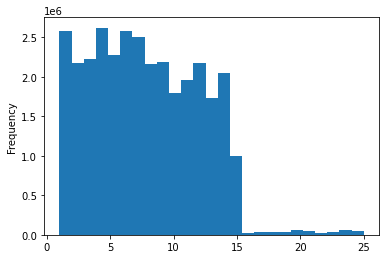

In [18]:
# Rerun histogram

hist = ords_prods_viz['prices'].plot.hist(bins = 25)

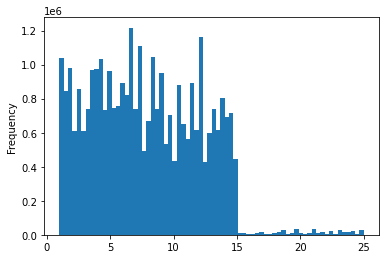

In [19]:
hist = ords_prods_viz['prices'].plot.hist(bins = 70)

### Creating Line Charts

In [20]:
np.random.seed(4)
dev = np.random.rand(len(ords_prods_viz)) <= 0.7

In [21]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [22]:
big = ords_prods_viz[dev]
small = ords_prods_viz[~dev]

In [23]:
len(ords_prods_viz)

32404859

In [25]:
# Check subset sizes 
len(big) + len(small)

32404859

In [38]:
pd.set_option('display.max_columns', None)
ords_prods_viz.head(100)

,Unnamed: 0_x,Unnamed: 0.1,order_id,user_id,eval_set,user_order_count,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,Unnamed: 0_y,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_price,spender,mean_frequency,frequency_flag
0,0,0,2539329,1,prior,1,2,8,NaN,196,1,0,both,195,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.259259,Non-frequent customer
1,1,1,2398795,1,prior,2,3,7,15.0,196,1,1,both,195,Soda,77,7,9.0,Mid-range product,Regularly busy,Least busy,Average orders,10,New customer,6.367797,Low spender,20.259259,Non-frequent customer
2,2,2,473747,1,prior,3,3,12,21.0,196,1,1,both,195,Soda,77,7,9.0,Mid-range product,Regularly busy,Least busy,Average orders,10,New customer,6.367797,Low spender,20.259259,Non-frequent customer
3,3,3,2254736,1,prior,4,4,7,29.0,196,1,1,both,195,Soda,77,7,9.0,Mid-range product,Least busy,Least busy,Average orders,10,New customer,6.367797,Low spender,20.259259,Non-frequent customer
4,4,4,431534,1,prior,5,4,15,28.0,196,1,1,both,195,Soda,77,7,9.0,Mid-range product,Least busy,Least busy,Average orders,10,New customer,6.367797,Low spender,20.259259,Non-frequent customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,5895,5895,3226575,360,prior,1,5,12,NaN,196,1,0,both,195,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy,Average orders,3,New customer,10.006250,High spender,4.909091,Frequent customer
96,6137,6137,1469869,377,prior,3,5,17,3.0,196,9,0,both,195,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy,Average orders,3,New customer,8.496552,Low spender,16.500000,Regular customer
97,6259,6259,1927023,387,prior,2,4,10,22.0,196,3,0,both,195,Soda,77,7,9.0,Mid-range product,Least busy,Least busy,Most orders,8,New customer,7.396610,Low spender,9.125000,Frequent customer
98,6740,6740,858092,420,prior,4,1,19,30.0,196,2,0,both,195,Soda,77,7,9.0,Mid-range product,Regularly busy,Busiest days,Average orders,22,Regular customer,7.387805,Low spender,11.181034,Regular customer


In [26]:
# Only pull columns for creation of chart

df_2 = small[['orders_day_of_week', 'prices']]

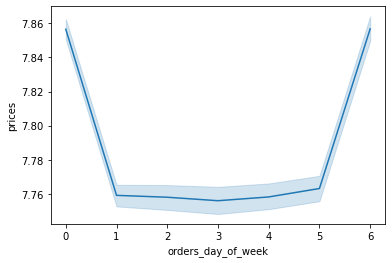

In [39]:
# Create line chart

line = sns.lineplot(data = df_2, x = 'orders_day_of_week', y = 'prices')